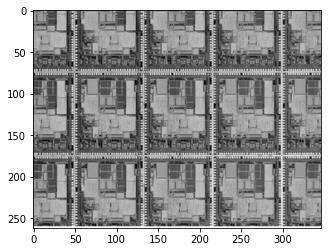

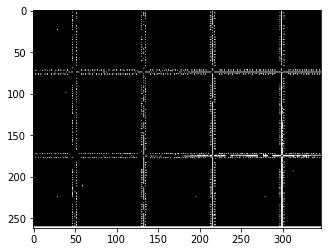

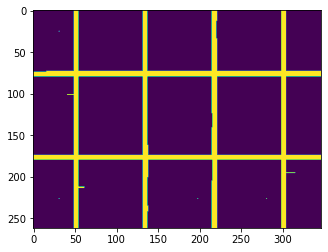

Number of contours detected: 8


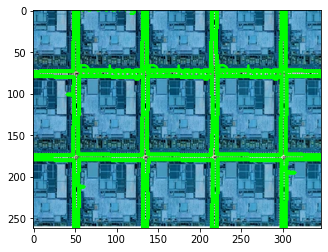

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('dies_or.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray,cmap='gray')
plt.show()

ret,thresh = cv2.threshold(gray,200,255,0) # cv2.threshold(gray,150,255,0)
plt.imshow(thresh,cmap='gray')
plt.show()

# # smooth the image to avoid noises
# gray = cv2.medianBlur(gray,5)
# # Apply adaptive threshold
# thresh = cv2.adaptiveThreshold(gray, 255, 1, 1, 11, 2)
# thresh_color = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
# # apply some dilation and erosion to join the gaps
kernel = np.ones((8,8), np.uint8)
thresh = cv2.dilate(thresh, kernel ,iterations = 2)
thresh = cv2.erode(thresh, kernel, iterations = 2)
plt.imshow(thresh)
plt.show()

contours,hierarchy = cv2.findContours(thresh, 1, 3)
print("Number of contours detected:", len(contours))


for cnt in contours:
   x1,y1 = cnt[0][0]
   approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
   if len(approx) > 2:
      x, y, w, h = cv2.boundingRect(cnt)
      ratio = float(w)/h
      if ratio >= 0.9 and ratio <= 1.1:
         img = cv2.drawContours(img, [cnt], -1, (0,255,255), 3)
         cv2.putText(img, 'Square', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)
      else:
         cv2.putText(img, 'Rectangle', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
         img = cv2.drawContours(img, [cnt], -1, (0,255,0), 3)

plt.imshow(img)